In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix
import graphviz
%matplotlib inline


Random under-sampling:
1    4944
0    4944
Name: 心血管疾病, dtype: int64


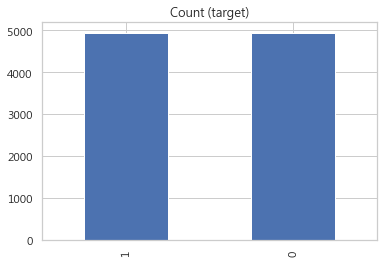

In [8]:
#https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
df = pd.read_csv(r"C:\\Users\\USER\\Desktop\\python_practice\\CVD_ALL.csv",encoding = 'big5')
# 清除遺漏值
df = df.dropna()
# Class count
count_class_0, count_class_1 = df['心血管疾病'].value_counts()

# Divide by class
df_class_0 = df[df['心血管疾病'] == 0]
df_class_1 = df[df['心血管疾病'] == 1]

# 使用undersampling 從 non-disease 資料中取出跟 disease者數量相當的樣本
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['心血管疾病'].value_counts())

df_test_under['心血管疾病'].value_counts().plot(kind='bar', title='Count (target)');

In [9]:
label = df_test_under.columns[2:]
X = df_test_under[label]
y = df_test_under["心血管疾病"]

# 切割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training-set accuracy score: 0.7217
Confusion matrix

 [[2434 1506]
 [ 695 3275]]
Accuracy: 0.72174
Precision: 0.685
Recall: 0.82494
F1: 0.74849


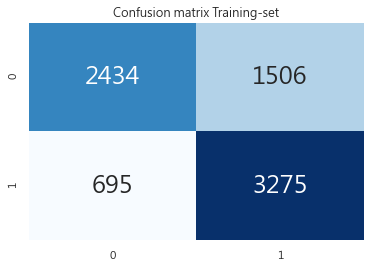

In [10]:
import matplotlib.pyplot as plt # data visualization

# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

# find the training set's accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

# Decision Tree Confusion Matrix for gini using the training set
cm = confusion_matrix(y_train, y_pred_train_gini)

print('Confusion matrix\n\n', cm)
plt.title('Confusion matrix Training-set')
plt = sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

## precision, recall, f1, support
acc = accuracy_score(y_train, y_pred_train_gini)
accuracy_dict, precision_dict, recall_dict, f1_dict = dict(), dict(), dict(), dict()
precision, recall, f1, support = precision_recall_fscore_support(y_train,y_pred_train_gini, average='binary')
acc, precision, recall, f1 = round(acc, 5), round(precision, 5), round(recall, 5), round(f1, 5)
    
accuracy_dict["Decision Tree"] = acc
precision_dict["Decision Tree"] = precision
recall_dict["Decision Tree"] = recall
f1_dict["Decision Tree"] = f1
print(f'Accuracy: {acc}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

Testing-set accuracy score: 0.7351
Confusion matrix

 [[620 384]
 [140 834]]
Accuracy: 0.73509
Precision: 0.685
Recall: 0.82494
F1: 0.74849


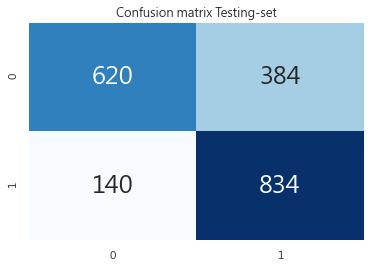

In [11]:
import matplotlib.pyplot as plt # data visualization

# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_gini)
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

# Construct the confusion matrix using the test data
cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)
# visualize the matrix
plt.title('Confusion matrix Testing-set')
plt = sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

## precision, recall, f1, support
acc = accuracy_score(y_test, y_pred_gini)
accuracy_dict, precision_dict, recall_dict, f1_dict = dict(), dict(), dict(), dict()
precision, recall, f1, support = precision_recall_fscore_support(y_train,y_pred_train_gini, average='binary')
acc, precision, recall, f1 = round(acc, 5), round(precision, 5), round(recall, 5), round(f1, 5)
    
accuracy_dict["Decision Tree"] = acc
precision_dict["Decision Tree"] = precision
recall_dict["Decision Tree"] = recall
f1_dict["Decision Tree"] = f1
print(f'Accuracy: {acc}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

[Text(558.0, 587.0880000000001, 'X[0] <= 48.5\ngini = 0.5\nsamples = 7910\nvalue = [3940, 3970]'),
 Text(279.0, 456.624, 'X[2] <= 2.5\ngini = 0.401\nsamples = 3418\nvalue = [2468, 950]'),
 Text(139.5, 326.1600000000001, 'X[0] <= 30.5\ngini = 0.166\nsamples = 756\nvalue = [687, 69]'),
 Text(69.75, 195.69600000000003, 'X[8] <= 25.0\ngini = 0.046\nsamples = 212\nvalue = [207, 5]'),
 Text(34.875, 65.23200000000008, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(104.625, 65.23200000000008, 'gini = 0.037\nsamples = 210\nvalue = [206, 4]'),
 Text(209.25, 195.69600000000003, 'X[7] <= 86.5\ngini = 0.208\nsamples = 544\nvalue = [480, 64]'),
 Text(174.375, 65.23200000000008, 'gini = 0.201\nsamples = 538\nvalue = [477, 61]'),
 Text(244.125, 65.23200000000008, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(418.5, 326.1600000000001, 'X[0] <= 40.5\ngini = 0.443\nsamples = 2662\nvalue = [1781, 881]'),
 Text(348.75, 195.69600000000003, 'X[0] <= 33.5\ngini = 0.361\nsamples = 1427\nvalue = [1090, 3

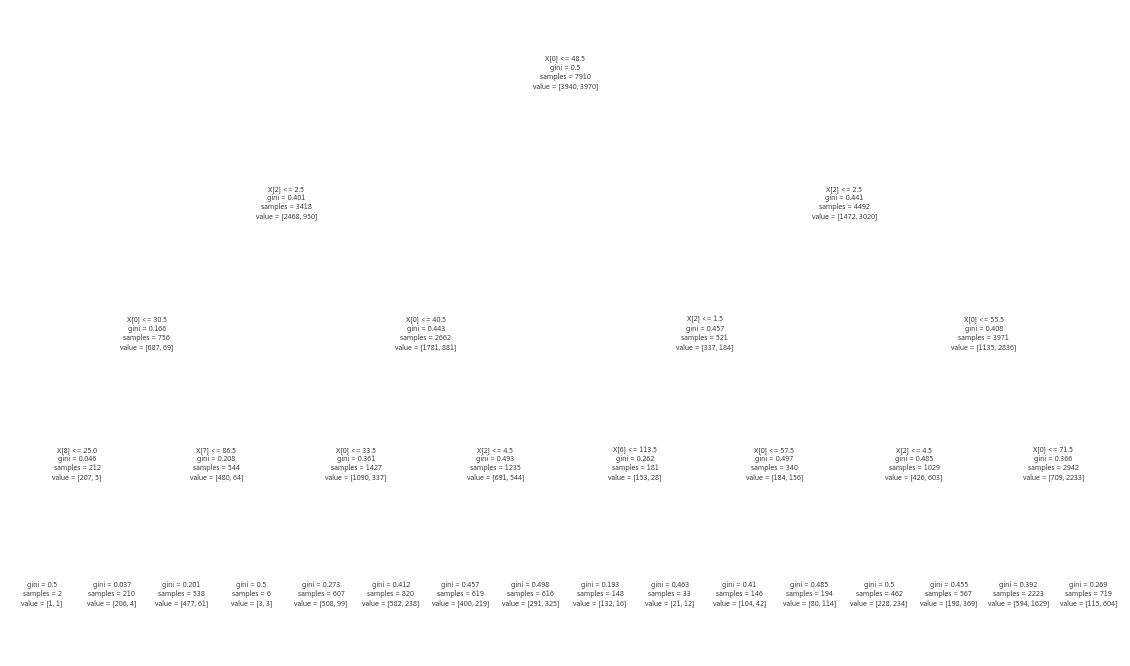

In [12]:
# 將決策樹畫出來
import matplotlib.pyplot as plt # data visualization
plt.figure(figsize=(20,12))
#訓練資料作圖 Visualize the tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

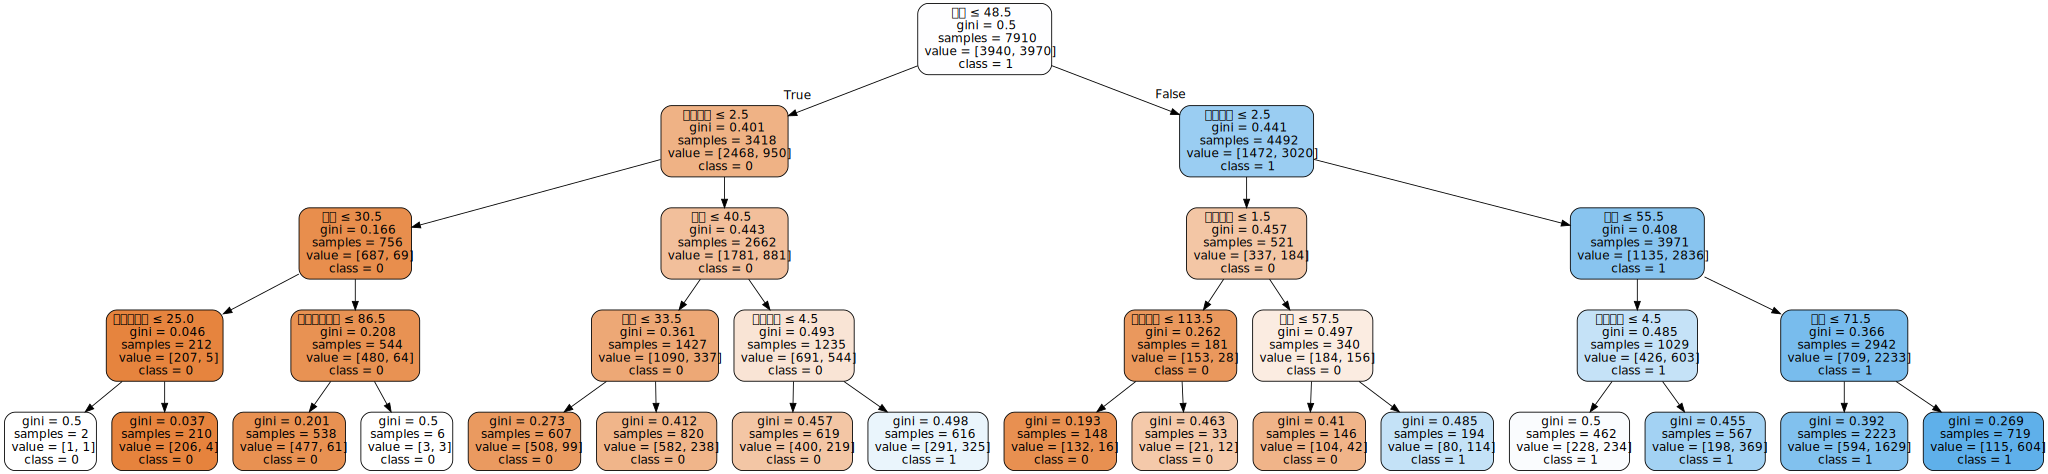

In [13]:
## about class name
## https://datascience.stackexchange.com/questions/20415/what-should-be-the-order-of-class-names-in-sklearn-tree-export-function-beginne
# Visualize decision-trees with graphviz
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=['0','1'],  
                              filled=True, rounded=True,  
                              special_characters=True,)
graph = graphviz.Source(dot_data.replace('helvetica','"Microsoft YaHei"'), encoding='utf-8')
# graph = graphviz.Source(dot_data) 
graph.render('Decision_tree_gini',view=True)
graph 